In [ ]:
#pip install matplotlib-venn

# Dénombrement

## 1 Rappel sur les ensembles

### Vocabulaire

| Notations | Vocabulaire | Notations | Vocabulaire |
|-----------|-------------|-----------|-------------|
| $\varnothing$ | ensemble vide | $A \cup B$ | réunion de $A$ et $B$ |
| $\Omega$ | ensemble (non vide) | $A \cap B$ | intersection de $A$ et $B$ |
| $\{\omega\}, \omega \in \Omega$ | singleton de $\Omega$ | $A - B$ | intersection de $A$ et $\overline{B}$ |
| $A$ | partie de $\Omega$ | $A \cap B = \varnothing$ | $A$ et $B$ sont disjoints |
| $\omega \in A$ | $\omega$ appartient à $A$ | $A \subseteq B$ | $A$ est inclus dans $B$ |
| $\overline{A}$ | complémentaire de $A$ dans $\Omega$ | $A \times B$ | produit cartésien de $A$ et $B$ |


{'d', 'e', 'b', 'a'} ∩ {'d', 'f', 'c', 'b'} = {'d', 'b'}


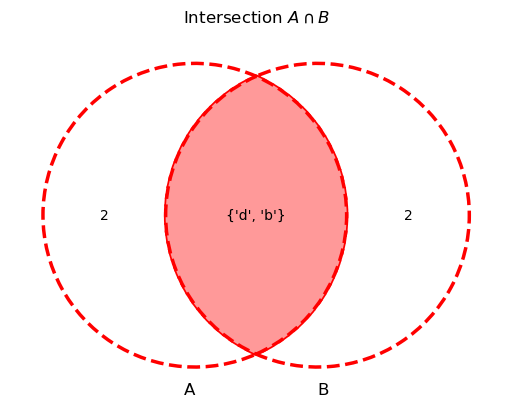

In [47]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

A = set(['a', 'b','d','e'])
B = set(['b', 'c','d','f'])


v = venn2([A, B], set_labels=('A', 'B'))

# Colorer uniquement l'intersection en rouge, le reste en blanc
v.get_patch_by_id('11').set_color('#FF9999')  # intersection en rouge
v.get_patch_by_id('11').set_alpha(1.0)

for subset in ('10', '01'):
    patch = v.get_patch_by_id(subset)
    if patch is not None:
        patch.set_color('white')      # couleur blanche hors intersection
        patch.set_alpha(1.0)

# Changer la couleur du contour des cercles A et B en pointillé
for patch in [v.get_patch_by_id('10'), v.get_patch_by_id('01'), v.get_patch_by_id('11')]:
    if patch is not None:
        patch.set_edgecolor('red')      # Couleur du contour
        patch.set_linewidth(2.5)        # Épaisseur du contour
        patch.set_linestyle('dashed')   # Style pointillé
# Afficher les éléments de l'intersection dans la zone '11'
intersection = A & B
print(f"{A} ∩ {B} = {intersection}")    

v.get_label_by_id('11').set_text(str(intersection))
plt.title("Intersection $A \\cap B$")
plt.show()

{'b', 'a'} ∪ {'c', 'b'} = {'c', 'b', 'a'}


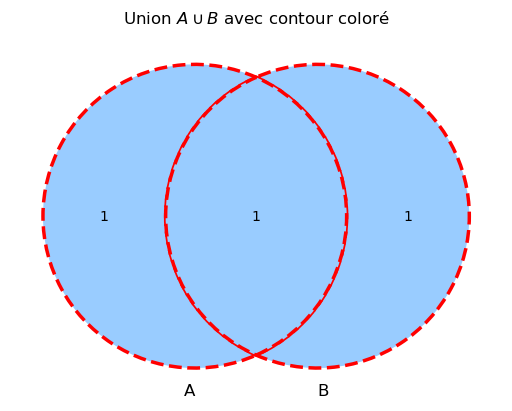

In [48]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

A = set(['a', 'b'])
B = set(['b', 'c'])

v = venn2([A, B], set_labels=('A', 'B'))

# Colorier l'union en bleu
for subset in ('10', '01', '11'):
    v.get_patch_by_id(subset).set_color('#99CCFF')
    v.get_patch_by_id(subset).set_alpha(1.0)

# Changer la couleur du contour des cercles A et B en pointillé
for patch in [v.get_patch_by_id('10'), v.get_patch_by_id('01'), v.get_patch_by_id('11')]:
    if patch is not None:
        patch.set_edgecolor('red')      # Couleur du contour
        patch.set_linewidth(2.5)        # Épaisseur du contour
        patch.set_linestyle('dashed')   # Style pointillé
print(f"{A} ∪ {B} = {A | B}")
plt.title("Union $A \\cup B$ avec contour coloré")
plt.show()

Complémentaire de {'b', 'a'} dans {'c', 'b', 'a'} est {'c'}


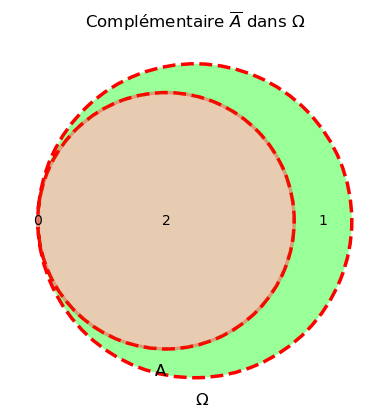

In [49]:
# Complémentaire coloré
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

Omega = set(['a', 'b', 'c'])
A = set(['a', 'b'])

v = venn2([A, Omega], set_labels=('A', '$\\Omega$'))
v.get_patch_by_id('01').set_color('#99FF99')  # vert pour le complémentaire
v.get_patch_by_id('01').set_alpha(1.0)
# On peut masquer la zone '10' (A seul) pour plus de clarté
v.get_patch_by_id('10').set_alpha(0.3)
v.get_patch_by_id('11').set_alpha(0.3)
# Changer la couleur du contour des cercles A et B en pointillé
for patch in [v.get_patch_by_id('10'), v.get_patch_by_id('01'), v.get_patch_by_id('11')]:
    if patch is not None:
        patch.set_edgecolor('red')      # Couleur du contour
        patch.set_linewidth(2.5)        # Épaisseur du contour
        patch.set_linestyle('dashed')   # Style pointillé
plt.title("Complémentaire $\\overline{A}$ dans $\\Omega$")
print(f"Complémentaire de {A} dans {Omega} est {Omega - A}")
plt.show()


### Exemple

$A = \{a, b\}, B = \{b, c\}, \Omega = \{a, b, c\}$

| Ensemble | Définition | Résultat |
|----------|------------|----------|
| $\overline{A}$ | $\{x \in \Omega; x \notin A\}$ | $\{c\}$ |
| $A \cup B$ | $\{x \in \Omega; x \in A \text{ ou } x \in B\}$ | $\{a, b, c\}$ |
| $A \cap B$ | $\{x \in \Omega; x \in A \text{ et } x \in B\}$ | $\{b\}$ |
| $A - B$ | $\{x \in \Omega; x \in A \text{ et } x \notin B\}$ | $\{a\}$ |
| $A \times B$ | $\{(x, y); x \in A \text{ et } y \in B\}$ | $\{(a, b), (a, c), (b, b), (b, c)\}$ |

In [18]:
# Produit Cartésien 

A = set(['a', 'b'])
B = set(['b', 'c'])

# Produit cartésien A × B
cartesian_product = [(x, y) for x in A for y in B]
print("A × B =", cartesian_product)

A × B = [('b', 'c'), ('b', 'b'), ('a', 'c'), ('a', 'b')]


In [21]:
from itertools import product
import pandas as pd

A = ['a', 'b',1]
B = ['x', 'c',2]

cartesian = list(product(A, B))
df = pd.DataFrame(cartesian, columns=['A', 'B'])
display(df)

,A,B
0,a,x
1,a,c
2,a,2
3,b,x
4,b,c
5,b,2
6,1,x
7,1,c
8,1,2


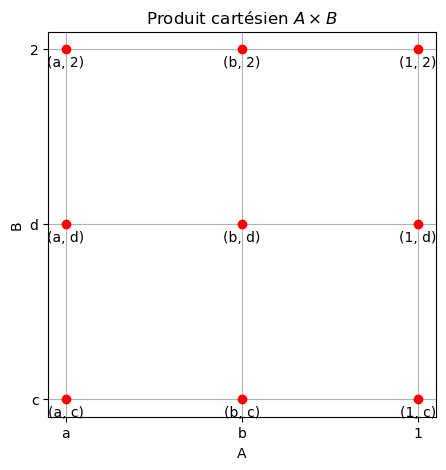

In [25]:
import matplotlib.pyplot as plt

A = ['a', 'b',1]
B = ['c', 'd',2]

# Associer chaque élément à une position numérique pour l'affichage
A_pos = {val: i for i, val in enumerate(A)}
B_pos = {val: i for i, val in enumerate(B)}

# Générer les couples du produit cartésien
cartesian = [(A_pos[a], B_pos[b]) for a in A for b in B]

# Affichage
plt.figure(figsize=(5, 5))
for (x, y) in cartesian:
    plt.plot(x, y, 'ro')  # point rouge
    plt.text(x, y-0.1, f"({A[x]}, {B[y]})", ha='center', fontsize=10)

plt.xticks(list(A_pos.values()), list(A_pos.keys()))
plt.yticks(list(B_pos.values()), list(B_pos.keys()))
plt.xlabel('A')
plt.ylabel('B')
plt.title("Produit cartésien $A \\times B$")
plt.grid(True)
plt.show()

### Opérations


$$
A \cup B  = B \cap A
$$

$$
A \cap B = B\cap A,
$$


$$
(A \cup B) \cap C = (A \cap C) \cup (B \cap C),
$$

$$
(A \cap B) \cup C = (A \cup C) \cap (B \cup C),
$$

$$
\left(\bigcup_{k=1}^{n} A_k\right) \cap B = \bigcup_{k=1}^{n} (A_k \cap B),
$$

$$
\left(\bigcap_{k=1}^{n} A_k\right) \cup B = \bigcap_{k=1}^{n} (A_k \cup B).
$$

### Lois de Morgan

$$
\overline{A \cup B} = \overline{A} \cap \overline{B}, \quad \overline{A \cap B} = \overline{A} \cup \overline{B},
$$

$$
\overline{\bigcup_{k=1}^{n} A_k} = \bigcap_{k=1}^{n} \overline{A}_k, \quad \overline{\bigcap_{k=1}^{n} A_k} = \bigcup_{k=1}^{n} \overline{A}_k.
$$

### Partition

$(A_k)_{k \in \{1,\ldots,n\}}$ partition de $\Omega \iff (A_k)_{k \in \{1,\ldots,n\}}$ disjoints deux à deux et $\bigcup_{k=1}^{n} A_k = \Omega$.



### Cardinal

Le nombre des éléments d'un ensemble fini $A$ est appelé cardinal de $A$. Il est noté $\text{Card}(A)$.

### Formule du crible (à l'ordre 2)

$$
\text{Card}(A \cup B) = \text{Card}(A) + \text{Card}(B) - \text{Card}(A \cap B).
$$

### Propriétés

\begin{align*}
&\text{Card}(\emptyset) = 0, \quad A \cap B = \emptyset \Rightarrow \text{Card}(A \cup B) = \text{Card}(A) + \text{Card}(B),\\
&\text{Card}(\overline{A}) = \text{Card}(\Omega) - \text{Card}(A), \quad \text{Card}(A) = \text{Card}(A \cap B) + \text{Card}(A \cap \overline{B}),\\
&\text{Card}(A - B) = \text{Card}(A) - \text{Card}(A \cap B), \quad A \subseteq B \Rightarrow \text{Card}(A) \leq \text{Card}(B),\\
&\text{Card}(A \times B) = \text{Card}(A) \text{Card}(B).
\end{align*}

## 2 Principes combinatoires

### Principe additif

On considère une situation qui nous amène à faire un choix parmi $n$ cas différents et exclusifs : le cas 1, ou le cas 2. . . , ou le cas $n$. Si, pour tout $k \in \{1, \ldots, n\}$, il y a $u_k$ possibilités pour le $k$-ème cas, alors le nombre total de possibilités est $\sum_{k=1}^{n} u_k$.

### Principe multiplicatif

On considère une situation conjuguant $k$ étapes : une étape 1, et une étape 2. . . ., et une étape $k$. Si, pour tout $i \in \{1, \ldots, k\}$, il y a $n_i$ possibilités pour la $k$-ème étape, alors le nombre total de possibilités est 

$$
\prod_{i=1}^k n_i.
$$

### Principe du quotient

Le **principe du quotient** permet de compter en divisant quand plusieurs configurations différentes correspondent au même résultat final à cause de répétitions ou de symétries.





### Liste, Arrangement, Permutation, Combinaison

- **Liste :** Liste ordonnée d'éléments avec répétitions.
- **Arrangement :** Liste ordonnée d'éléments sans répétition.
- **Permutation :** Arrangement de $n$ éléments parmi $n$.
- **Combinaison :** Partie d'un ensemble ; l'ordre n'est pas pris en compte.

### Exemple

Choix de 2 éléments parmi $\Omega = \{a, b, c\}$ :

| Choix | avec répétition | sans répétition |
|-------|-----------------|-----------------|
| avec ordre | Listes : $(a, a)$ $(a, b)$ $(a, c)$ $(b, a)$ $(b, b)$ $(b, c)$ $(c, a)$ $(c, b)$ $(c, c)$ (9) | Arrangements : $(a, b)$ $(a, c)$ $(b, a)$ $(b, c)$ $(c, a)$ $(c, b)$ (6) |
| sans ordre | Combinaisons avec répétitions : $[a, a]$ $[a, b]$ $[a, c]$ $[b, b]$ $[b, c]$ $[c, c]$ (6) | Combinaisons : $\{a, b\}$ $\{a, c\}$ $\{b, c\}$ (3) |

### Exemple : Permutations

Les permutations des éléments des 3 éléments de $\Omega$ sont : $(a, b, c)$, $(b, a, c)$, $(a, c, b)$, $(b, c, a)$, $(c, a, b)$, $(c, b, a)$. Il y en a 6.

### Nombre de Liste

Le nombre de listes possibles de $k$ éléments parmi $n$ est $n^k$.

### Factorielle

On appelle factorielle $n$ l'entier :

$$
n! = 1 \times 2 \times \ldots \times (n - 1) \times n = \prod_{i=1}^n i.
$$

On pose $0! = 1$.

### Nombre de permutations

Le nombre de permutations de $n$ éléments est $n!$.

## 3 Applications des principes

### Nombre d'arrangements

On appelle nombre d'arrangements "$k$ parmi $n$" l'entier :

$$
A_n^k = \frac{n!}{(n - k)!}.
$$

C'est le nombre d'arrangements possibles de $k$ éléments parmi $n$.


### Coefficient binomial

On appelle coefficient binomial "$k$ parmi $n$" l'entier :

$$
\binom{n}{k} = \frac{n!}{k!(n - k)!}.
$$

Si $k \notin \{0, \ldots, n\}$, on pose $\binom{n}{k} = 0$.

### Nombre de combinaisons

Le nombre de combinaisons possibles de $k$ éléments parmi $n$ est $\binom{n}{k}$.

In [34]:
def comb(n, k):
    '''
    Yield les sous ensembles de 1 .. n à k élément
    n -- un entier > 0
    k -- un entier > 0
    '''
    # Validation
    if n < 0:
        raise ValueError('n doit être > 0, mais n=%d' % n)
    if k < 0:
        raise ValueError('k doit être > 0, mais k=%d' % k)
    # cas particulier
    if k == 0 or n < k:
        yield set()
    elif n == k:
        yield set(range(1,n+1))

    else:
        # utiliser la formule récursive de Pascal:
        # choisir(n, k) = choisir(n - 1, k - 1) + choisir(n - 1, k)
        for s in comb(n - 1, k - 1):
            s.add(n)
            yield s
        for s in comb(n - 1, k):
            yield s

In [35]:
(list(comb(5,2)))

[{4, 5},
 {3, 5},
 {2, 5},
 {1, 5},
 {3, 4},
 {2, 4},
 {1, 4},
 {2, 3},
 {1, 3},
 {1, 2}]

## Formule des arrangements avec objets identiques

### Arrangement avec répétition

Soit un ensemble de $N$ objets où :
- $n_1$ objets sont identiques de type 1
- $n_2$ objets sont identiques de type 2
- $\vdots$
- $n_k$ objets sont identiques de type $k$

avec $N = n_1 + n_2 + \cdots + n_k$.

### Formule principale

Le nombre d'arrangements distincts est donné par :

$$
A = \frac{N!}{n_1! \cdot n_2! \cdot \ldots \cdot n_k!}
$$
### Avec notation produit

$$
A = \frac{N!}{\prod\limits_{i=1}^{k} n_i!}
$$

### Avec coefficient multinomial

$$
A = \binom{N}{n_1, n_2, \ldots, n_k} = \frac{N!}{n_1! n_2! \cdots n_k!}
$$

### Exemple

Pour $N = 5$ avec $n_1 = 2$ (objets A), $n_2 = 2$ (objets B), $n_3 = 1$ (objet C) :

$$
A = \frac{5!}{2! \cdot 2! \cdot 1!} = \frac{120}{2 \cdot 2 \cdot 1} = 30
$$




## Application aux Anagrammes

### Anagramme

Une **anagramme** est une permutation des lettres d'un mot ou d'une phrase qui forme un nouveau mot ou une nouvelle phrase, en utilisant **toutes les lettres exactement une fois**.

### Caractéristiques fondamentales

- **Même multiset de lettres** : Les deux mots doivent contenir exactement les mêmes lettres
- **Ordre différent** : L'ordre des lettres doit être modifié
- **Longueur identique** : Le nombre total de lettres reste le même

### Exemples classiques
* CHIEN → NICHE

* LOUPE → POULE

* MARIE → AIMER

* ORANGE → ONAGRE, ORGANE

* CHÉRIE → ECHIRE, RÉCHIE


### Approche mathématique et Formule

Le nombre d'anagrammes d'un mot de $N$ lettres avec des répétitions est donné par le coefficient multinomial :

$$
A = \frac{N!}{n_1! \cdot n_2! \cdot \ldots \cdot n_k!} = \binom{N}{n_1, n_2, \ldots, n_k}
$$

où :
- $N$ : nombre total de lettres
- $n_i$ : nombre d'occurrences de chaque lettre distincte
- $k$ : nombre de lettres différentes

### Cas particulier : toutes les lettres différentes

Si toutes les lettres sont distinctes ($n_i = 1$ pour tout $i$), la formule se simplifie :

$$
A = N!
$$

### Exemple

Pour le mot "ABCD" (4 lettres différentes) :
$$
A = 4! = 4 \times 3 \times 2 \times 1 = 24 \text{ anagrammes}
$$

### Cas général : avec répétitions

Quand certaines lettres se répètent, le nombre d'anagrammes diminue :

$$
A = \frac{N!}{\prod n_i!}
$$

### Exemple

Pour le mot "BALLON" :
- B : 1 fois
- A : 1 fois
- L : 2 fois
- O : 1 fois
- N : 1 fois

$$
A = \frac{6!}{1! \cdot 1! \cdot 2! \cdot 1! \cdot 1!} = \frac{720}{2} = 360 \text{ anagrammes}
$$

### MISSISSIPPI
Lettres : M, I, S, S, I, S, S, I, P, P, I

Fréquence : M(1), I(4), S(4), P(2)

N = 11

$A = \frac{11!}{1! \cdot 4! \cdot 4! \cdot 2!} = \frac{39,916,800}{24 \times 24 \times 2} = 34,650$


In [31]:
import itertools
from itertools import combinations_with_replacement
import string
from math import factorial
from numpy import prod
import os


def anagrams(word):
    """ Generate all of the anagrams of a word. """ 
    if len(word) < 2:
        yield word
    else:
        for i, letter in enumerate(word):
            if not letter in word[:i]: #éviter les duplications
                for j in anagrams(word[:i]+word[i+1:]):
                    yield j+letter

def numbanagram(word):
    occ=[word.count(i) for i in set(word)]
    return(int(factorial(len(word))/prod([factorial(i) for i in occ])))
        
numbanagram("MISSISSIPPI")


34650

In [ ]:
ANA=anagrams("MISSISSIPPI")
print(numbanagram("MISSISSIPPI"))

34650


In [33]:
for i in range(5):
    print(next(ANA))

IPPISSISSIM
PIPISSISSIM
PPIISSISSIM
IPIPSSISSIM
PIIPSSISSIM


### Donner le nombre d'anagramme de MISSISSIPPI tels que les S ne sont pas toutes cote à cotes

In [36]:
import re

In [ ]:
ANA=anagrams("MISSISSIPPI")
result=[i for i in ANA if not re.search('SSS', i)]
len(result)


27930

In [ ]:
ANA=anagrams("MISSISSIPPI")
patt3S = re.compile("SSS")
res = []
for i in ANA:
    if patt3S.search(i):
        res.append(i)
print(len(res))

6720


In [43]:
ANA=anagrams("MISSISSIPPI")
patt3S = re.compile("SSS")
res = []
for i in ANA:
    if not patt3S.search(i):
        res.append(i)
print(len(res))

27930



### Remarque

Plus un mot contient de lettres répétées, moins il a d'anagrammes distincts. Les anagrammes représentent les **permutations avec répétition** d'un multiset.

## 4- Combinaisons avec répétition

### Combinaisons avec répétition

Les **combinaisons avec répétition** permettent de compter le nombre de façons de choisir $k$ objets parmi $n$ types différents, avec la possibilité de sélectionner plusieurs fois le même type d'objet.

### Formule

Le nombre de façons de choisir $k$ objets parmi $n$ types différents, avec la possibilité de sélectionner plusieurs fois le même type d'objet est donnée par :

 $$
 \binom{n + k - 1}{k} = \frac{(n + k - 1)!}{k!(n - 1)!}
 $$

Cette formule correspond au nombre de combinaisons de $k$ objets parmi $n$ avec répétition autorisée.

### Exemples d'application

1. **Choix de bonbons** : Dans un magasin proposant $n = 5$ parfums différents, le nombre de façons de choisir $k = 3$ bonbons (en pouvant prendre plusieurs fois le même parfum) est :
    $$
   \binom{5 + 3 - 1}{3} = \binom{7}{3} = 35
     $$
    
2. **Composition de glaces** : Pour une glace avec $k = 2$ boules choisies parmi $n = 4$ parfums (répétition autorisée), le nombre de possibilités est :
     $$
   \binom{4 + 2 - 1}{2} = \binom{5}{2} = 10
     $$
    
3. **Solutions entières d'équations** : Le nombre de solutions entières non négatives de l'équation $x_1 + x_2 + x_3 = 5$ est :
     $$
     \binom{3 + 5 - 1}{5} = \binom{7}{5} = 21
     $$
    où $x_i$ représente le nombre d'occurrences du type $i$.
    
4. **Distributions identiques** : Répartir $k = 6$ livres identiques parmi $n = 4$ personnes (une personne peut recevoir plusieurs livres) :
     $$
    \binom{4 + 6 - 1}{6} = \binom{9}{6} = 84
     $$

### Différence avec les combinaisons simples

- **Combinaisons simples** : Pas de répétition, ordre sans importance
     $$
    \binom{n}{k} = \frac{n!}{k!(n - k)!}
     $$
    
- **Combinaisons avec répétition** : Répétition autorisée, ordre sans importance
     $$
    \binom{n + k - 1}{k}
     $$

### Interprétation combinatoire

Les combinaisons avec répétition correspondent au nombre de multisets de taille $k$ formés à partir de $n$ éléments différents, ou au nombre de solutions entières non négatives de l'équation $x_1 + x_2 + \cdots + x_n = k$.